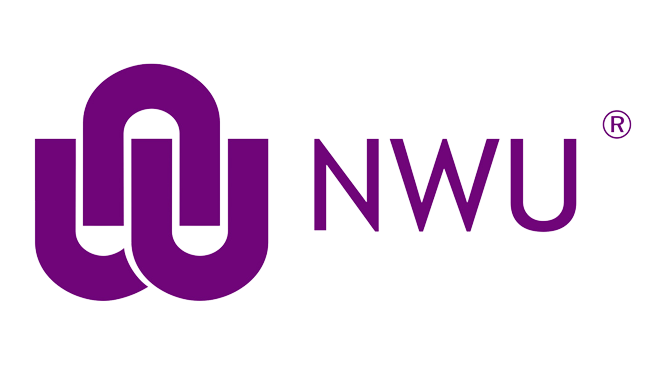

# **CISM 623: Machine Learning**

# **Student Details**

*   # Student Name and Surname: Murendeni Netshianane
*   # University Number: 42618282


# Practical Lab 3

# CLASS: B.Sc Computer Science (HONS)

# DUE DATE: 25/ 08/ 2025 (Monday)

# START TIME: 17:00

# Instructions: Answer all Questions


## **Problem Statement**
## **Text Analysis and Natural Language Processing (NLP)**

## This project is designed to introduce students to the fundamental concepts and practical applications of Text Analysis and Natural Language Processing (NLP), two key areas in the field of Data Science and Artificial Intelligence. The focus of this project is on processing and analyzing text data from the classic novel "Alice's Adventures in Wonderland" by Lewis Carroll.

## **Why Text Analysis and NLP?**
## Text Analysis and NLP involves the use of computational techniques to understand, interpret, and generate human language. These techniques are essential in various applications such as search engines, sentiment analysis, machine translation, chatbots, and more. By analyzing text data, we can extract meaningful insights, automate tasks like categorization, and develop models that can interact with human language in intelligent ways.

### Import Libraries and Read In the Data

### **Do not modify or remove any of the code in these cells.**

In [103]:
import nltk
# Tokenization and stemming (you can choose a language as compared to Porter stemmer)
from nltk import TreebankWordTokenizer, SnowballStemmer

from nltk.stem import WordNetLemmatizer #lemmatization
from nltk.corpus import stopwords
import string #we use this module to convert the 'case' of the text
import urllib #used to handle URL: in this instance we fetch our .txt)

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [104]:
# Define a function to read from a local .txt file
def read_local_file(file_path):
    with open(file_path, 'r', encoding='ISO-8859-1') as f:
        return f.read()

# Specify the path to your local text file
file_path = '/content/sample_data/alice_in_wonderland.txt'

# Read the file and print the first 863 characters
data = read_local_file(file_path)
print(data[:863])

Alice's Adventures in Wonderland

                ALICE'S ADVENTURES IN WONDERLAND

                          Lewis Carroll

               THE MILLENNIUM FULCRUM EDITION 3.0




                            CHAPTER I

                      Down the Rabbit-Hole


  Alice was beginning to get very tired of sitting by her sister
on the bank, and of having nothing to do:  once or twice she had
peeped into the book her sister was reading, but it had no
pictures or conversations in it, `and what is the use of a book,'
thought Alice `without pictures or conversation?'

  So she was considering in her own mind (as well as she could,
for the hot day made her feel very sleepy and stupid), whether
the pleasure of making a daisy-chain would be worth the trouble
of getting up and picking the daisies, when suddenly a White
Rabbit with pink eyes ran close by her.

 


### Convert to lowercase and remove punctuation  

### **Do not change or remove any of the code in these cells**

In [105]:
def remove_punctuation(words):
    words = words.lower()
    return ''.join([x for x in words if x not in string.punctuation])

# Store the original data before it gets modified
original_data = data

In [106]:
data = remove_punctuation(data)

### Creating a bag of words and assigning our stemmer and lemmatizer

### **Pay special attention to what these functions return and how the subsequent texts and lists look**

In [107]:
# define stemmer function
stemmer = SnowballStemmer('english')

# tokenise data
tokeniser = TreebankWordTokenizer()
tokens = tokeniser.tokenize(original_data)

# define lemmatiser
lemmatizer = WordNetLemmatizer()

# bag of words
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary
        with each word as a key, and the value represents the number of
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

# remove stopwords
tokens_less_stopwords = [word for word in tokens if word not in stopwords.words('english')]

# create bag of words
bag_of_words = bag_of_words_count(tokens_less_stopwords)

## **Question 1**

Use the stemmer and lemmatizer functions (defined in the cells above) from the relevant library to find the stem and lemma of the nth word in the token list.

_**Function Specifications:**_
* Should take a `list` as input and return a  `dict` type as output.
* The dictionary should have the keys **'original',  'stem' and 'lemma'** with the corresponding values being the nth word transformed in that way.

In [108]:
### Question 1 ###
def find_roots(token_list, n):
    if n >= len(token_list):
        return {"original": None, "stem": None, "lemma": None}

    word = token_list[n]
    return {
        "original": word,
        "stem": stemmer.stem(word),
        "lemma": lemmatizer.lemmatize(word)
    }

In [109]:
find_roots(tokens, 80)

{'original': 'Alice', 'stem': 'alic', 'lemma': 'Alice'}

_**Expected Outputs:**_
```python
find_roots(tokens, 80) ==
{'original': 'Alice',
'stem': 'alic',
'lemma': 'alice'}
```


## **Question 2**

How many stopwords are in the text in total?   

_Hint_ : you can use the nltk stopwords dictionary

_**Function Specifications:**_
* Function should take a `list` as input
* The number of stopwords should be returned as an `int`

In [117]:
### START FUNCTION
def count_stopwords(token_list):
    # your code here
    stop_words = set(stopwords.words("english"))
    return sum(1 for word in token_list if word in stop_words)


### END FUNCTION

In [118]:
count_stopwords(tokens)

12290

_**Expected output:**_

```python
count_stopwords(tokens) == 12286
```

## **Question 3**

You have been provided with a list of words (tokens) extracted from a text document. Your task is to identify how many unique words are present in this list. Write a Python function called unique_words that accepts the list of tokens as input and returns the total count of unique words in the list.

    Hint: You may use a data structure that automatically removes duplicate entries to help you find the number of unique words.

_**Function Specifications:**_
* Function should take a `list` as input and return an `int`

In [110]:
### START FUNCTION
# your code here
def unique_words(token_list):
    return len(set(token_list))
### END FUNCTION

In [111]:
unique_words(tokens)

3628

_**Expected output:**_

```python
unique_words(tokens) == 3628
```

## **Question 4**

You have been provided with a dictionary where the keys are words, and the values represent the frequency of each word's occurrence in a text. Your task is to write a Python function called most_common_word that takes this dictionary and an integer k as inputs. The function should return the kth most frequently occurring word in the text.

    Hint: You will need to sort the dictionary by the frequency of the words in descending order to find the kth most common word.

_**Function Specifications:**_
* Function should take a `dict` and an `int` k as input
* Function should return the kth most common word as a `str`

Example:

bag_of_words = {'alice': 15, 'rabbit': 10, 'little': 8, 'queen': 5, 'wonderland': 12} and k=2,

the function should return  **wonderland**, as it is the second most frequent word in the text.



In [112]:
### START FUNCTION
# your code here
# Question 4
def most_common_word(bag, k):
    # Sort the dictionary by frequency in descending order
    sorted_words = sorted(bag.items(), key=lambda x: x[1], reverse=True)

    # Check if k is within valid range
    if k <= 0 or k > len(sorted_words):
        return None

    # Return the kth most common word (k-1 because indexing starts at 0)
    return sorted_words[k-1][0]

In [113]:
most_common_word(bag_of_words, 6)

'Alice'

_**Expected output:**_

```python
most_common_word(bag_of_words, 6) == 'Alice'

```

## **Question 5**

How many words appear n times in the text?

_**Function Specifications:**_
* Input is taken as a `dict` and an `int` n, where n is the number of times the word appears in the text
* Count the number of words that appear n times in the text
* Output should be the count as an `int`

Example:
```python
For the dictionary bag_of_words = {'alice': 15, 'rabbit': 10, 'little': 8,

'queen': 5, 'wonderland': 12, 'hat': 5, 'cat': 5, 'mouse': 8, 'mad': 8, 'tea': 5} and n=5,

the function should return 4, because there are four words that appear exactly 5 times in the text
```

In [114]:
def word_frequency_count(bag, n):
    return sum(1 for count in bag.values() if count == n)

In [115]:
word_frequency_count(bag_of_words, 5)

116

In [116]:
word_frequency_count(bag_of_words, 8)

55

_**Expected output:**_

```python
word_frequency_count(bag_of_words, 5) == 116
word_frequency_count(bag_of_words, 8) == 55

```